In [129]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [130]:

# Define the matrix
A = np.array([[1, 2], 
              [3, 4]])



In [131]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)



In [132]:

# Output the results
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [-0.37228132  5.37228132]
Eigenvectors:
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


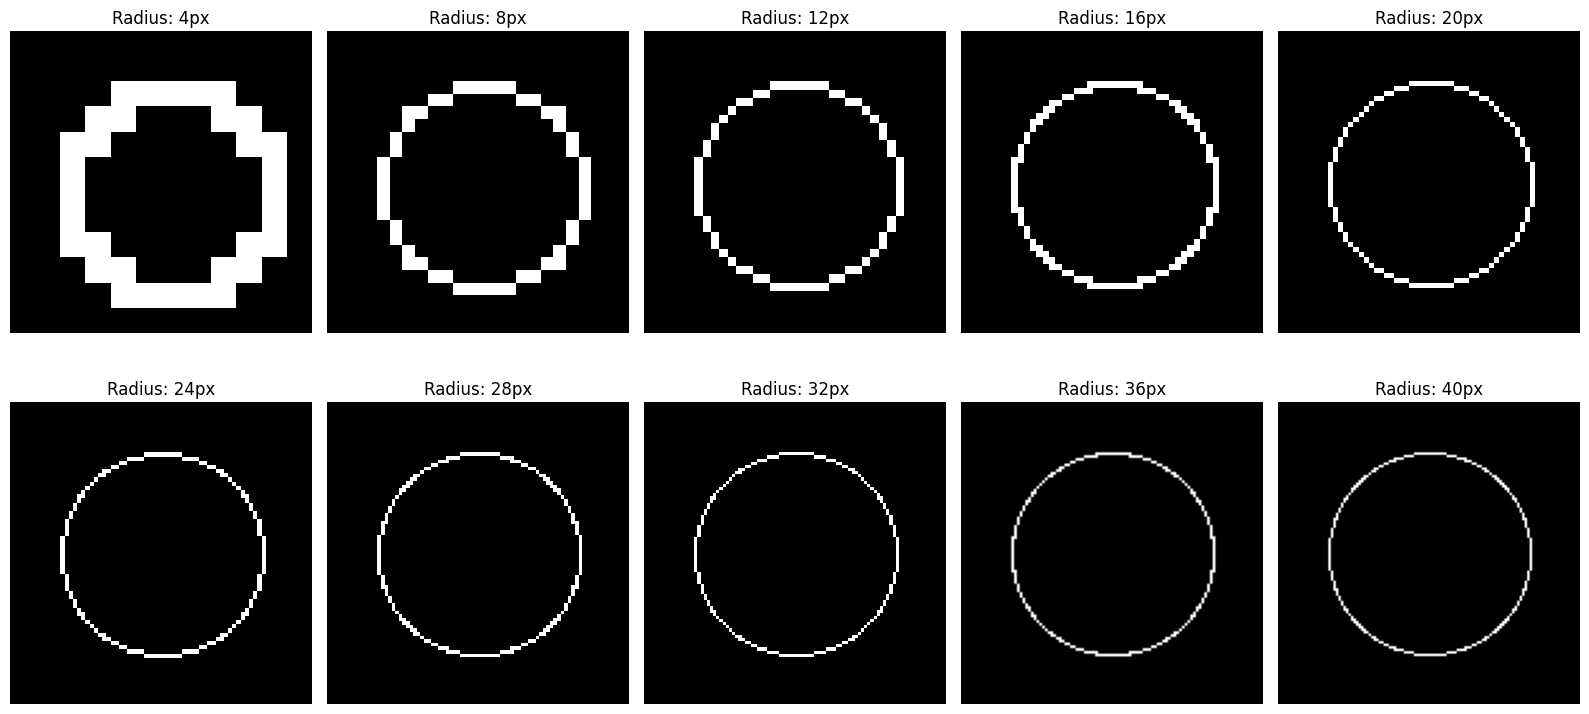

In [133]:
# Function to create an image with a hollow circle of a given radius
# 4*3 = 12px x 12px
def create_hollow_circle_image_with_margin(radius):
    # Image size = Diameter + radius (to leave r/2 margin on each side)
    size = 3 * radius
    image = np.zeros((size, size))

    center = size // 2

    # Create a hollow circle
    for y in range(size):
        for x in range(size):
            dist = np.sqrt((x - center) ** 2 + (y - center) ** 2)
            if radius - 0.5 < dist < radius + 0.5:
                image[y, x] = 1

    return image

# Radii ranging from 4 to 40
radii = np.linspace(4, 40, 10).astype(int)

# Create and display images
fig, axes = plt.subplots(2, 5, figsize=(16, 8))
for ax, radius in zip(axes.flatten(), radii):
    image = create_hollow_circle_image_with_margin(radius)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Radius: {radius}px")
    ax.axis('off') # Hide axes

plt.tight_layout()
plt.show()


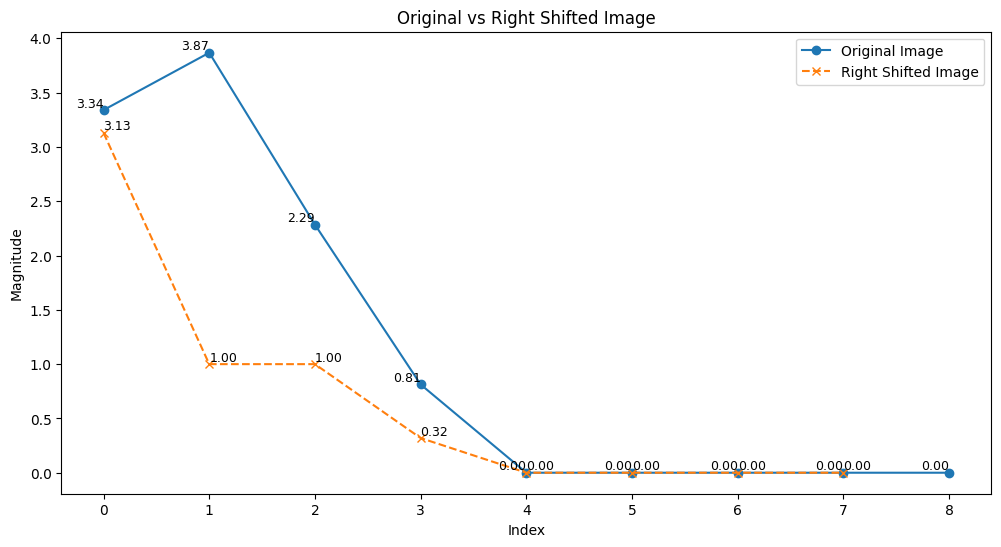

Pairs with angle >= 0.95:
Pair (i=0, j=1) has cosine similarity: 0.9610
Pair (i=0, j=2) has cosine similarity: 0.9610
Pair (i=1, j=0) has cosine similarity: 0.9952


Text(0.5, 1.0, 'Right shift Image')

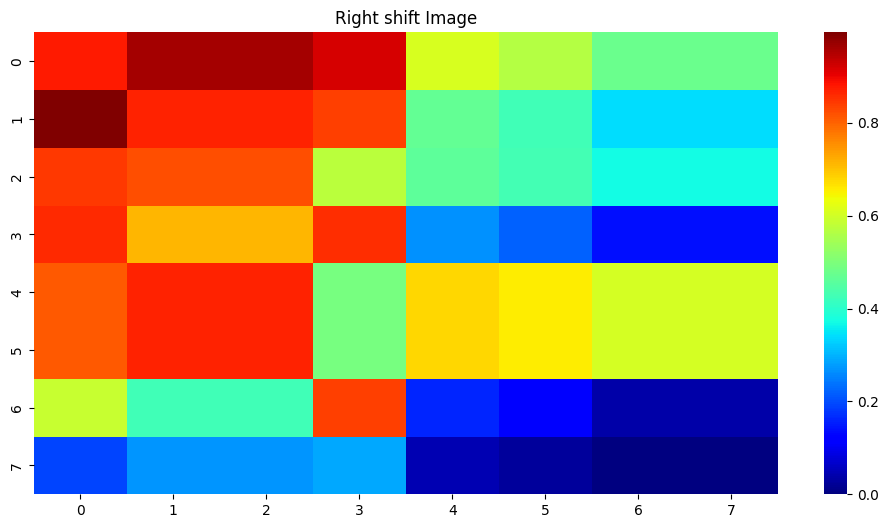

In [142]:
image = create_hollow_circle_image_with_margin(4)

zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T


eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T


plt.figure(figsize=(12, 6))
# Plotting both eVal and eVal_shifted on the same graph
plt.plot(np.abs(eVal), label='Original Image', linestyle='-', marker='o')
plt.plot(np.abs(eVal_shifted), label='Right Shifted Image', linestyle='--', marker='x')
# Adding value labels to each point on the plot
for i, val in enumerate(np.abs(eVal)):
    plt.text(i, val, f'{val:.2f}', fontsize=9, ha='right', va='bottom')
for i, val in enumerate(np.abs(eVal_shifted)):
    plt.text(i, val, f'{val:.2f}', fontsize=9, ha='left', va='bottom')
plt.title('Original vs Right Shifted Image')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])
angle = np.zeros((min_dim, min_dim))

# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')



24
[ 3.23606798e+00 -1.23606798e+00  3.90482296e-31 -1.31501868e-18
 -3.16227766e+00 -2.82842712e+00  3.16227766e+00  2.82842712e+00
  2.27969952e-16 -1.44467108e-16  9.38635405e-18  7.15041419e-32
  4.78959436e-48  2.55444940e-34  1.44098129e-50 -3.56083790e-66
 -2.58022508e-51  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[[ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  1.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.000000

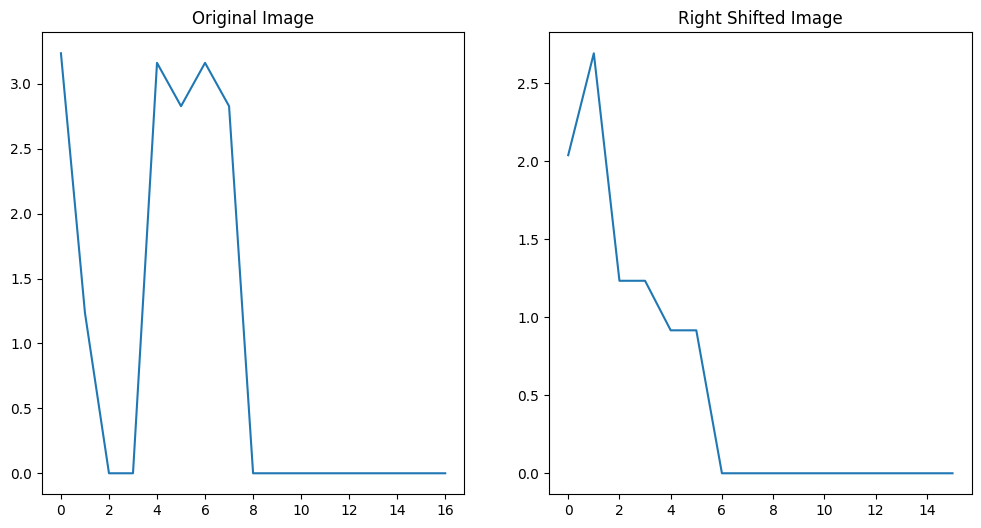

Pairs with angle >= 0.80:
Pair (i=8, j=0) has cosine similarity: 0.8158
Pair (i=9, j=0) has cosine similarity: 0.8730
Pair (i=9, j=2) has cosine similarity: 0.8038
Pair (i=9, j=3) has cosine similarity: 0.8038


Text(0.5, 1.0, 'Right shift Image')

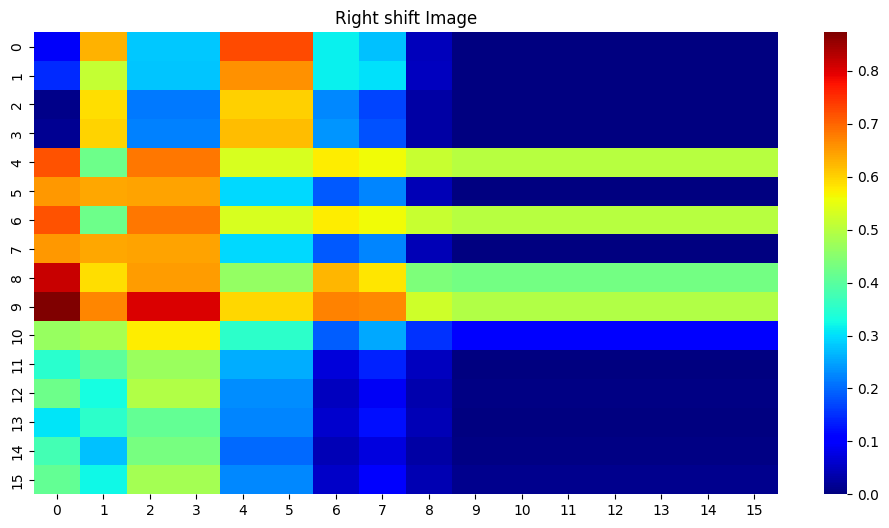

In [144]:
image = create_hollow_circle_image_with_margin(8)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
print(eVal)
print(eVec)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T
print(eVec)

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])
angle = np.zeros((min_dim, min_dim))

# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.80:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.80:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


36
25


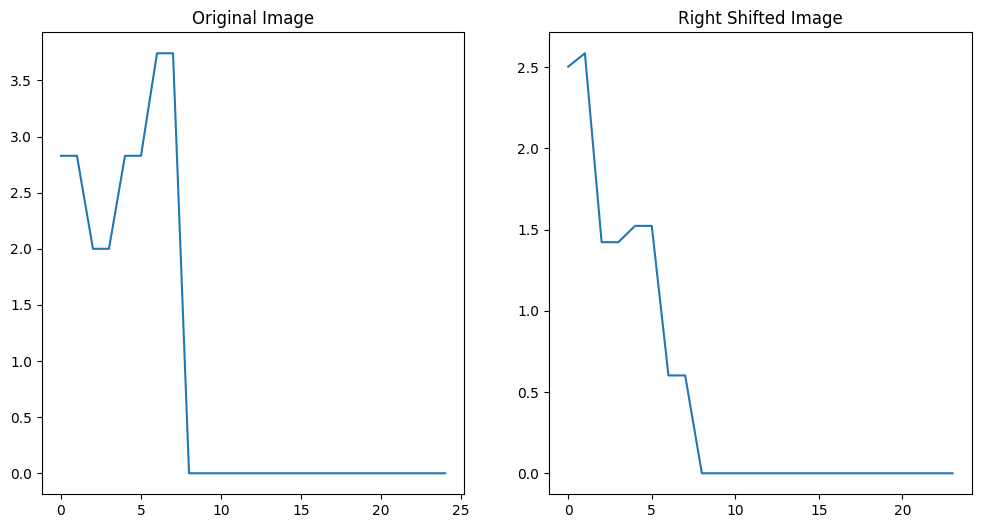

Pairs with angle >= 0.50:
Pair (i=0, j=6) has cosine similarity: 0.5827
Pair (i=0, j=7) has cosine similarity: 0.5827
Pair (i=0, j=8) has cosine similarity: 0.6568
Pair (i=1, j=6) has cosine similarity: 0.5827
Pair (i=1, j=7) has cosine similarity: 0.5827
Pair (i=1, j=8) has cosine similarity: 0.6568
Pair (i=2, j=4) has cosine similarity: 0.7061
Pair (i=2, j=5) has cosine similarity: 0.7061
Pair (i=3, j=4) has cosine similarity: 0.7061
Pair (i=3, j=5) has cosine similarity: 0.7061
Pair (i=4, j=0) has cosine similarity: 0.6443
Pair (i=4, j=1) has cosine similarity: 0.6153
Pair (i=4, j=2) has cosine similarity: 0.6099
Pair (i=4, j=3) has cosine similarity: 0.6099
Pair (i=5, j=0) has cosine similarity: 0.6443
Pair (i=5, j=1) has cosine similarity: 0.6153
Pair (i=5, j=2) has cosine similarity: 0.6099
Pair (i=5, j=3) has cosine similarity: 0.6099
Pair (i=6, j=0) has cosine similarity: 0.6048
Pair (i=6, j=1) has cosine similarity: 0.5467
Pair (i=6, j=2) has cosine similarity: 0.7141
Pair (i=

Text(0.5, 1.0, 'Right shift Image')

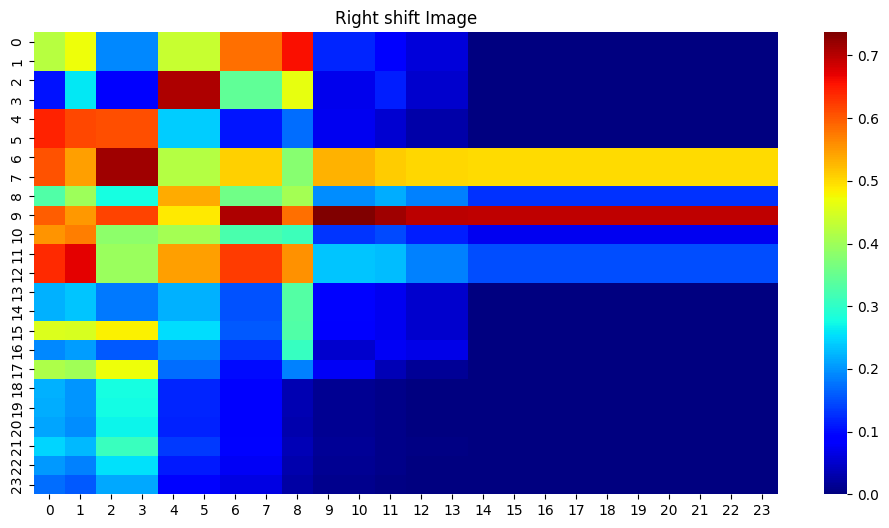

In [136]:
image = create_hollow_circle_image_with_margin(12)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.50:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.50:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


48
33


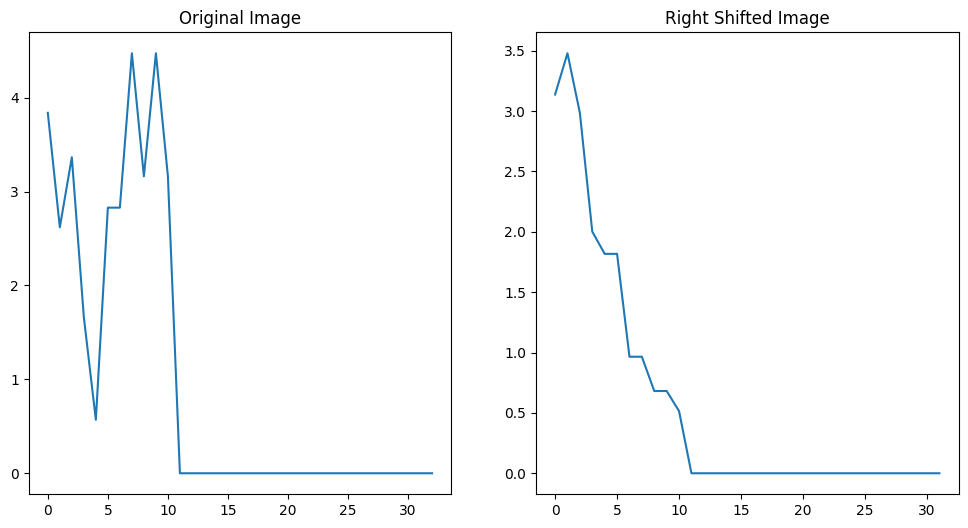

Pairs with angle >= 0.95:


Text(0.5, 1.0, 'Right shift Image')

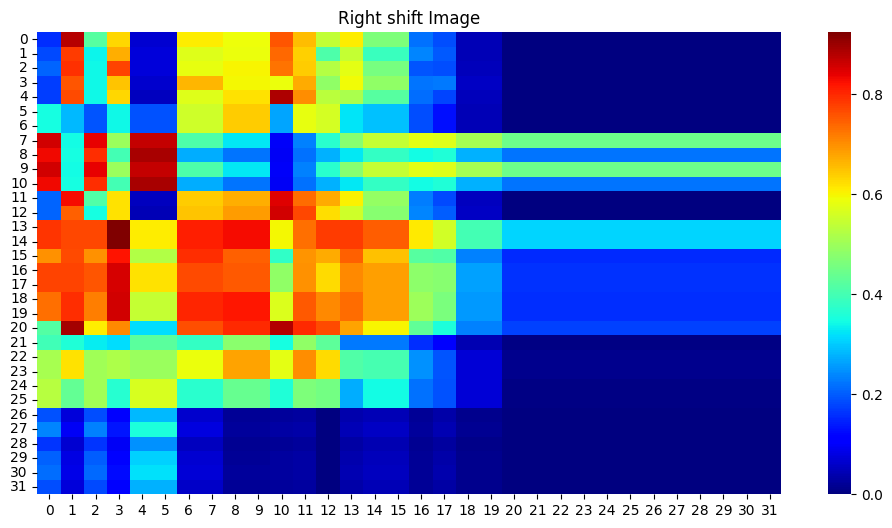

In [137]:
image = create_hollow_circle_image_with_margin(16)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


60
41


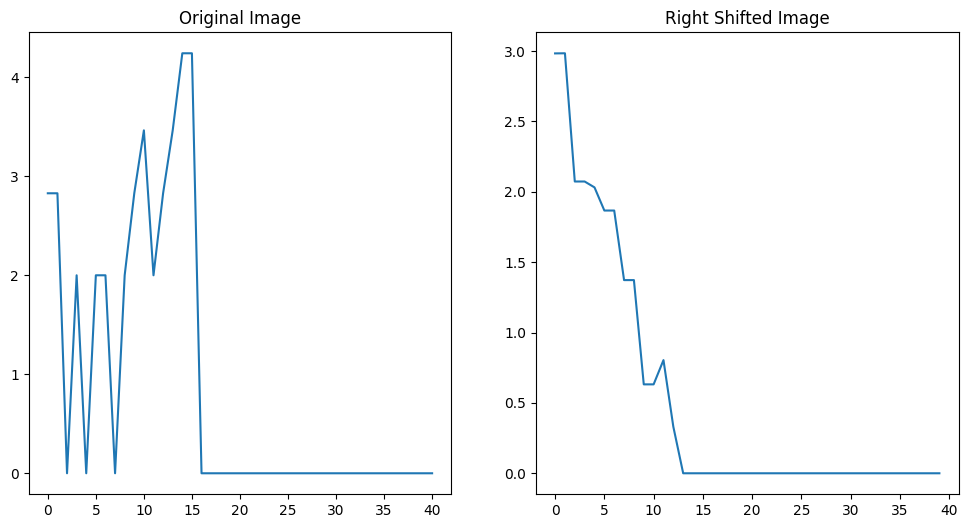

Pairs with angle >= 0.95:


Text(0.5, 1.0, 'Right shift Image')

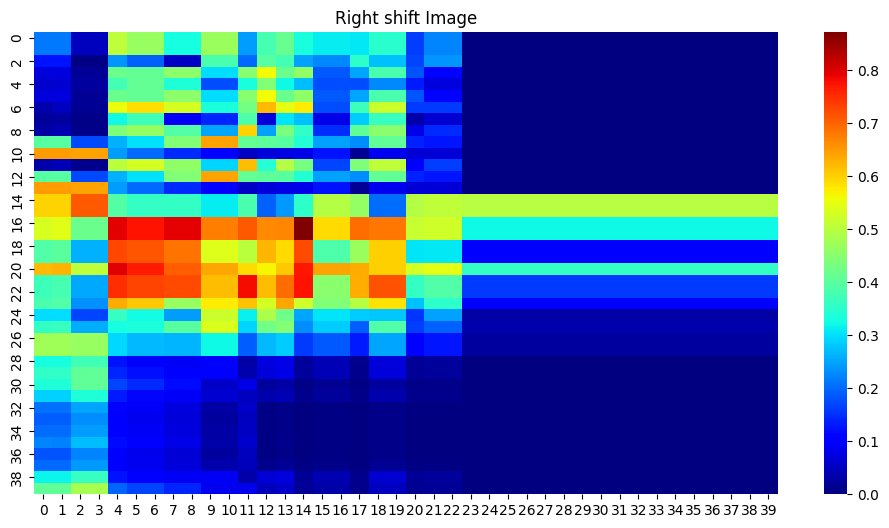

In [138]:
image = create_hollow_circle_image_with_margin(20)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


72
49


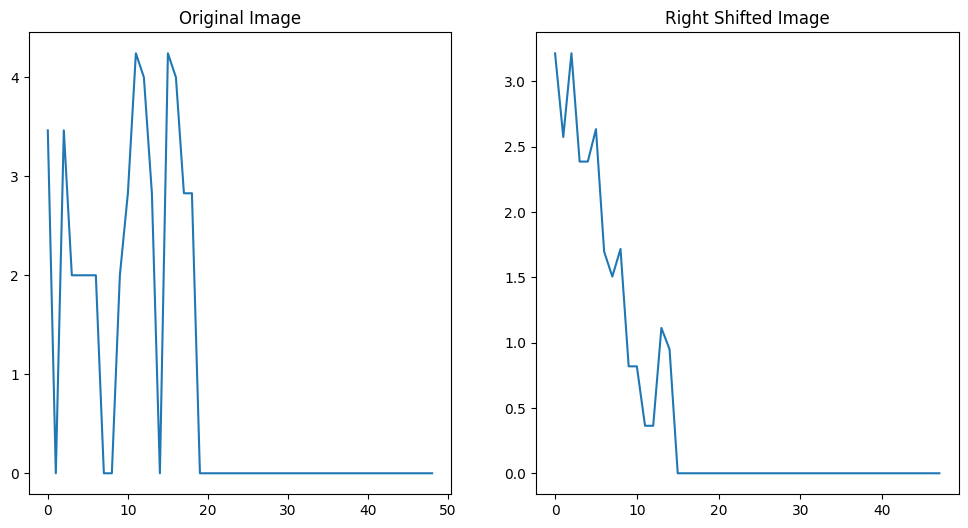

Pairs with angle >= 0.95:


Text(0.5, 1.0, 'Right shift Image')

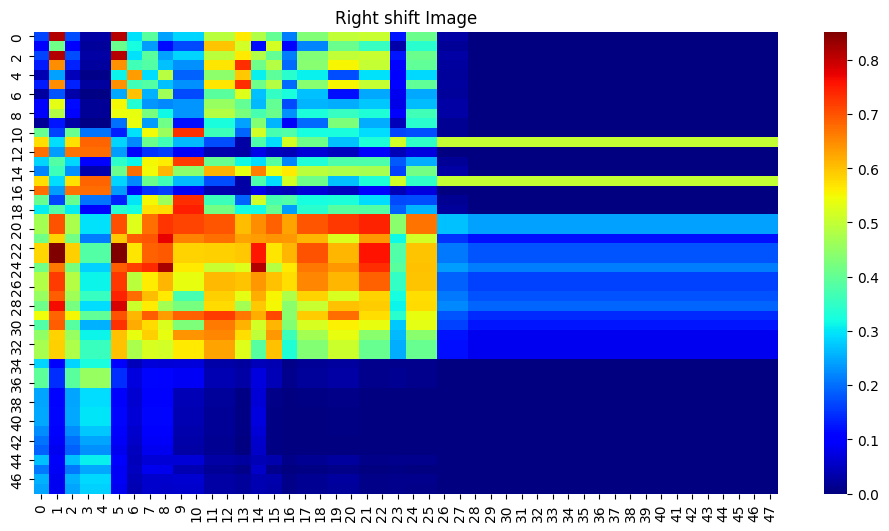

In [139]:
image = create_hollow_circle_image_with_margin(24)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


84
57


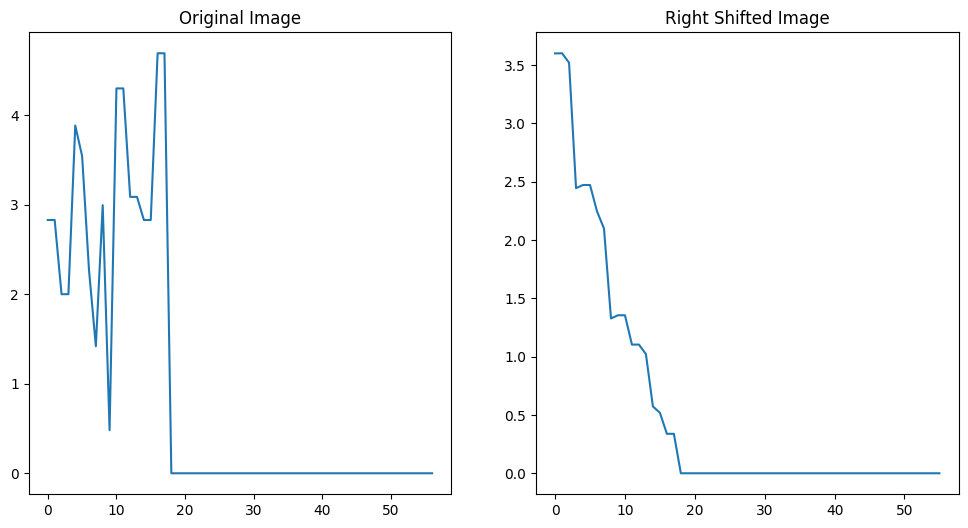

Pairs with angle >= 0.95:
Pair (i=4, j=2) has cosine similarity: 0.9798


Text(0.5, 1.0, 'Right shift Image')

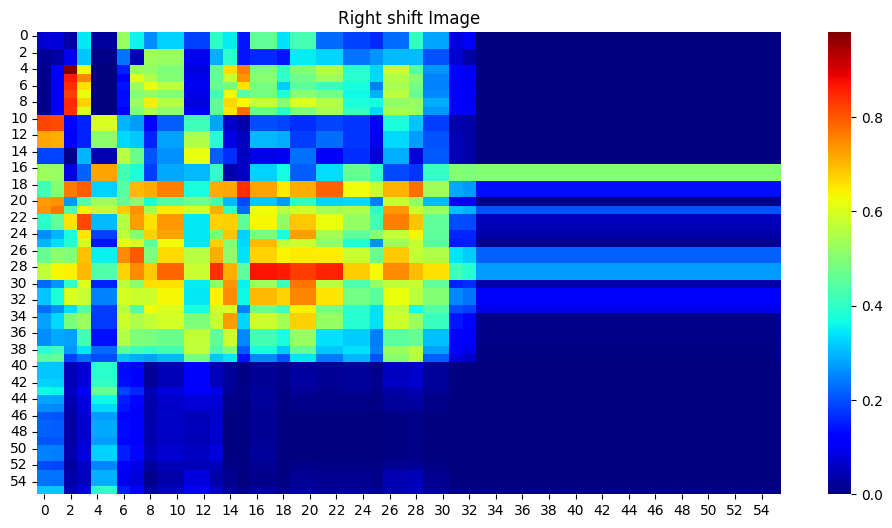

In [140]:
image = create_hollow_circle_image_with_margin(28)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')
